Import all packages which will be used


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load data

In [2]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

Make a copy

In [3]:
train_origional = train.copy()
test_origional = test.copy()


In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
train.shape

(18288, 3)

In [7]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
test.shape

(5112, 2)

Converted dtype Datetime to datetime

In [10]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')


In [11]:
train_origional['Datetime'] = pd.to_datetime(train_origional.Datetime, format = '%d-%m-%Y %H:%M')
test_origional['Datetime'] = pd.to_datetime(test_origional.Datetime, format = '%d-%m-%Y %H:%M')


In [12]:
for i in (train, test, train_origional, test_origional):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [13]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [14]:
train['day of week'] = train['Datetime'].dt.dayofweek
# train['day of week']

In [15]:
temp = train['Datetime']

+ 1: weekend: T7, CN
+ 0: not weekend

In [16]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else: 
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] =temp2

In [17]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


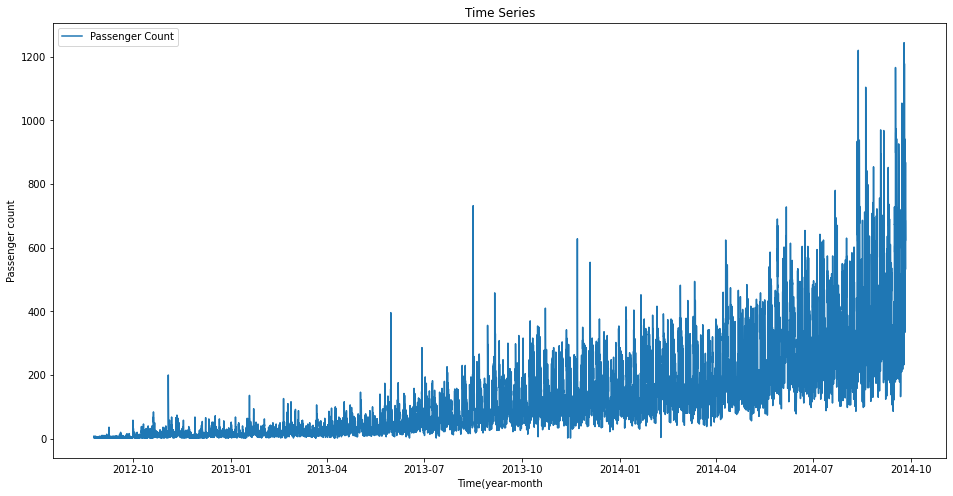

In [18]:
train.index =train['Datetime']
df = train.drop('ID',1)
ts = df['Count']

plt.figure(figsize =(16,8))
plt.plot(ts, label= 'Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month')
plt.ylabel('Passenger count')
plt.legend()

Số lượng hành khách hàng năm

In [19]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


<AxesSubplot:xlabel='year'>

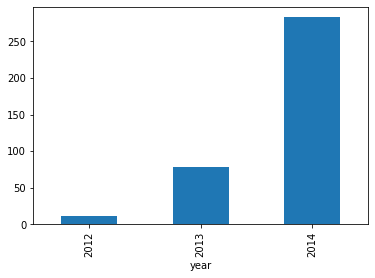

In [20]:
passenger_per_year = train.groupby('year')['Count'].mean()

passenger_per_year.plot.bar()

<AxesSubplot:xlabel='year'>

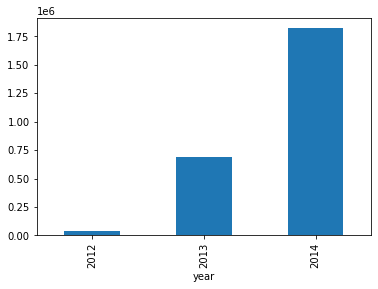

In [21]:
passenger_per_year = train.groupby('year')['Count'].sum()

passenger_per_year.plot.bar()

In [22]:
train.head(2)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


<AxesSubplot:xlabel='month'>

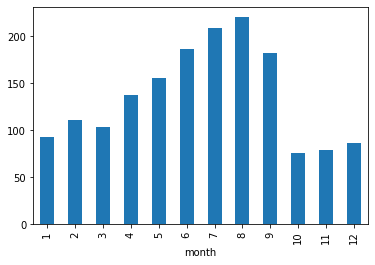

In [23]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenger count(month)'}, xlabel='year,month'>

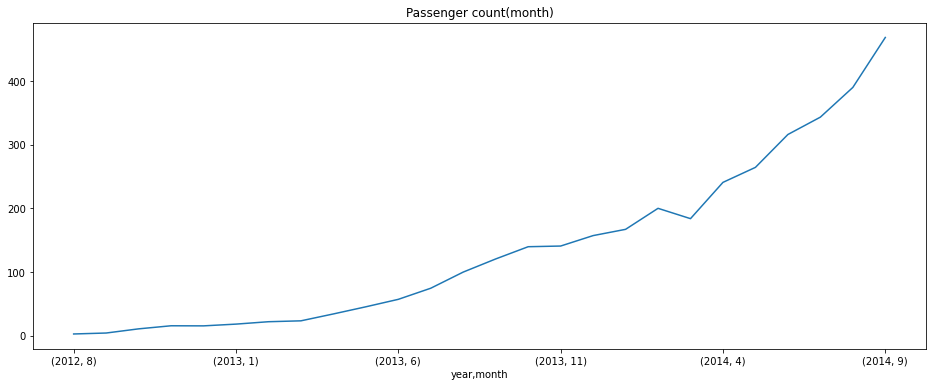

In [24]:
train.groupby(['year', 'month'])['Count'].mean().plot(figsize =(16,6), title = 'Passenger count(month)')

<AxesSubplot:xlabel='day'>

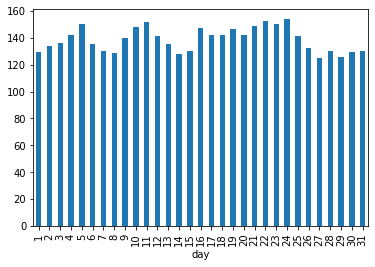

In [25]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

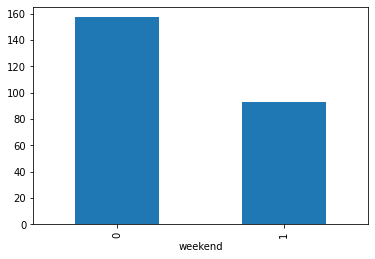

In [26]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

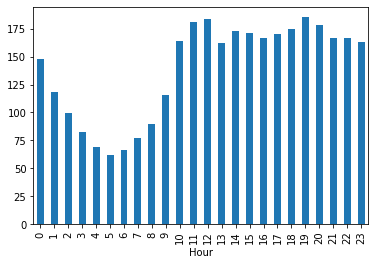

In [27]:
train.groupby('Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

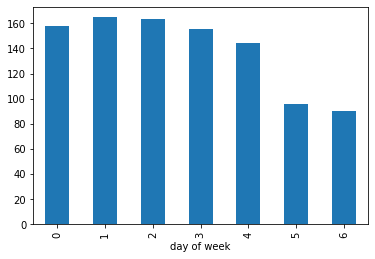

In [28]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [29]:
train = train.drop('ID',1)

In [30]:
train.to_timestamp=  pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.to_timestamp

In [31]:
#Hourly time series
hourly = train.resample('H').mean()
#Converting to daily mean
daily = train.resample('D').mean()
#converting to weekly mean
weekly =train.resample('W').mean()
#converting to monthly mean
monthly = train.resample('M').mean()

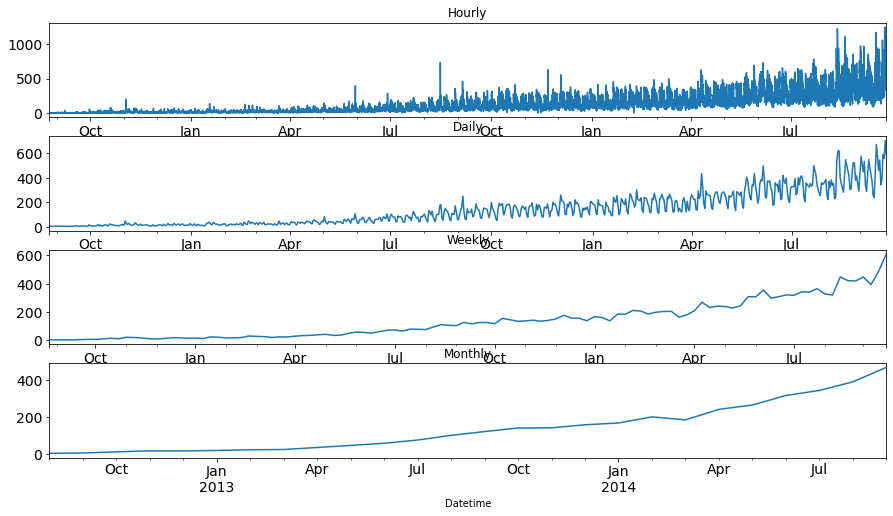

In [32]:
#chuỗi thời gian cho hàng giờ, hàng ngày, hàng tuần và hàng tháng
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize =(15,8), title ='Hourly', fontsize =14, ax=axs[0])
daily.Count.plot(figsize =(15,8), title ='Daily', fontsize =14, ax=axs[1])
weekly.Count.plot(figsize =(15,8), title ='Weekly', fontsize =14, ax=axs[2])
monthly.Count.plot(figsize =(15,8), title ='Monthly', fontsize =14, ax=axs[3])
plt.show()

Chuỗi thời gian càng ổn định hơn khih chúng ta tổng hợp nó hàng ngày, hàng tuần và hàng tháng.


Nhưng sẽ rất khó để chuyển đổi dự đoán hàng tuần hàng tháng sang dự đoán hàng giờ. Vì trước tiên chúng ta cần phải chuển đổi dự đoán hàng tháng thành hàng tuần, hàng tuần sang hàng ngày và hàng ngày sang hàng giờ.

Quá trình này sẽ rất rộng nên chúng ta sẽ chỉ làm việc trên chuỗi thời gian hàng ngày

In [33]:
test.to_timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index =test.to_timestamp
#converting to daily mean
test=test.resample('D').mean()

In [34]:
train.to_timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.to_timestamp
#converting to daily mean
train=train.resample('D').mean()

In [35]:
Train = train['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

In [36]:
Train.tail()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-06-20,379.916667,2014.0,6.0,20.0,11.5,4.0,0.0
2014-06-21,220.083333,2014.0,6.0,21.0,11.5,5.0,1.0
2014-06-22,230.833333,2014.0,6.0,22.0,11.5,6.0,1.0
2014-06-23,419.416667,2014.0,6.0,23.0,11.5,0.0,0.0
2014-06-24,372.166667,2014.0,6.0,24.0,11.5,1.0,0.0


In [37]:
valid.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0


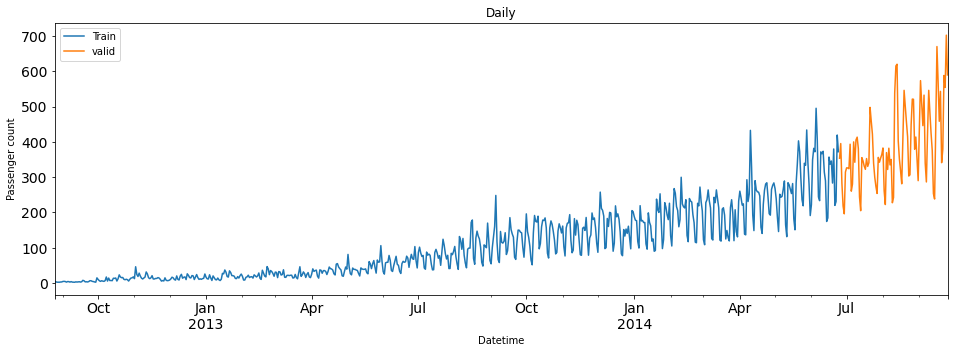

In [38]:
Train['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='Train')
valid['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')

plt.legend(loc ='best')
plt.show()


#### Kỹ thuật lập mô hình
+ Naive approach
+ moving average
+ simple exponential smoothing
+ Holt's Linear trend model

1. Naive approach

In [39]:
Train_count_asarray = np.asarray(Train.Count)
naive_value =Train_count_asarray[len(Train_count_asarray)-1]
naive_value

372.1666666666667

In [40]:
valid_naive = valid.copy()
valid_naive['naive'] = naive_value

In [41]:
valid_naive.head()

,Count,year,month,day,Hour,day of week,weekend,naive
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667


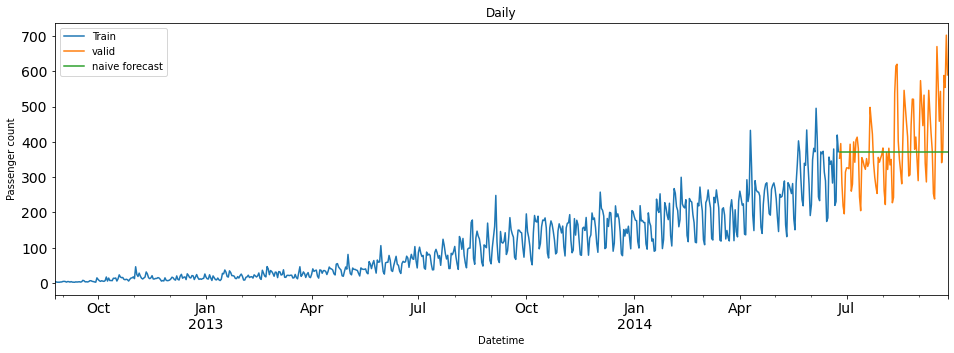

In [42]:
Train['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='Train')
valid['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='valid')
valid_naive['naive'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='naive forecast')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc ='best')
plt.show()


In [43]:
# độ chính xác rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, valid_naive.naive))
print(rmse)

111.79050467496724


2. Moving average

In [44]:
valid_avg = valid.copy()


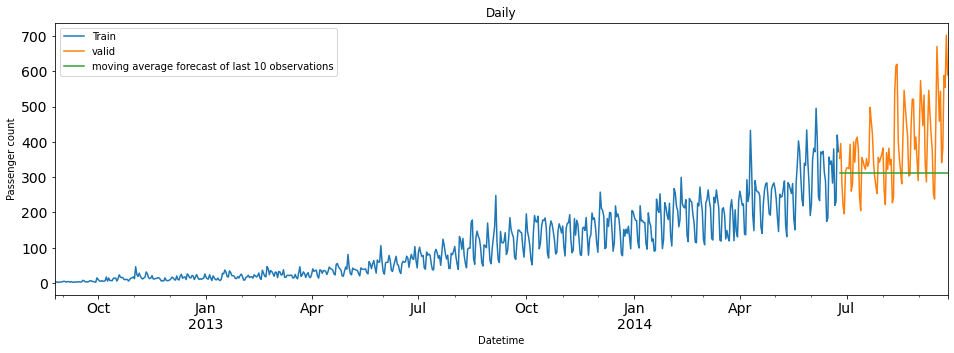

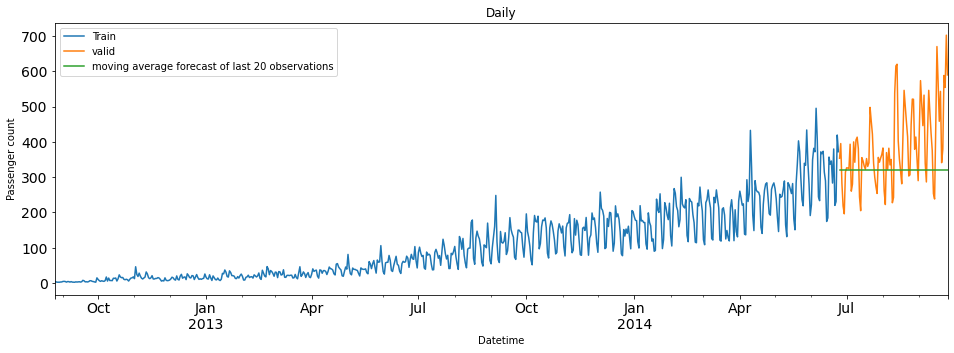

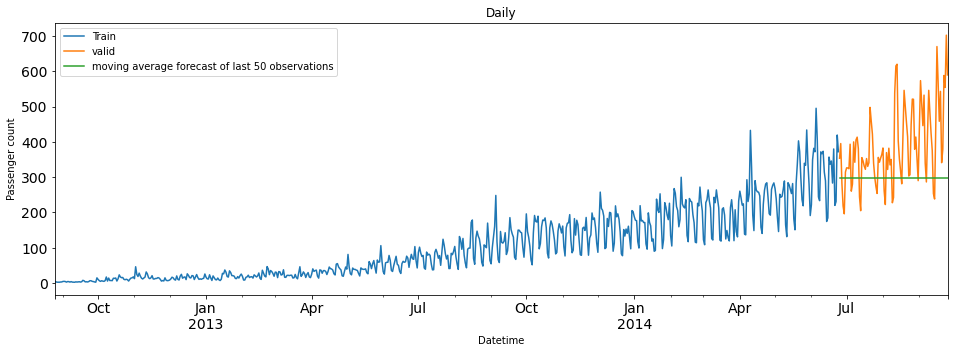

In [45]:
# 10 quan sats
valid_avg['moving_average'] = Train.Count.rolling(10).mean().iloc[-1]
Train['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='Train')
valid['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='valid')
valid_avg['moving_average'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='moving average forecast of last 10 observations')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc ='best')
plt.show()
# 20 quan sats
valid_avg['moving_average'] = Train.Count.rolling(20).mean().iloc[-1]
Train['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='Train')
valid['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='valid')
valid_avg['moving_average'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='moving average forecast of last 20 observations')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc ='best')
plt.show()
# 50 quan sats
valid_avg['moving_average'] = Train.Count.rolling(50).mean().iloc[-1]
Train['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='Train')
valid['Count'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='valid')
valid_avg['moving_average'].plot(figsize=(16,5), fontsize =14, title ='Daily', label ='moving average forecast of last 50 observations')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc ='best')
plt.show()


In [46]:
# độ chính xác rmse
rmse = sqrt(mean_squared_error(valid.Count, valid_avg['moving_average']))
print(rmse)

144.19175679986793


3. SES: Simple exponential smoothing

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
valid_ses = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train.Count)).fit(smoothing_level=0.6, optimized = False)
valid_ses['SES'] = fit2.forecast(len(valid))


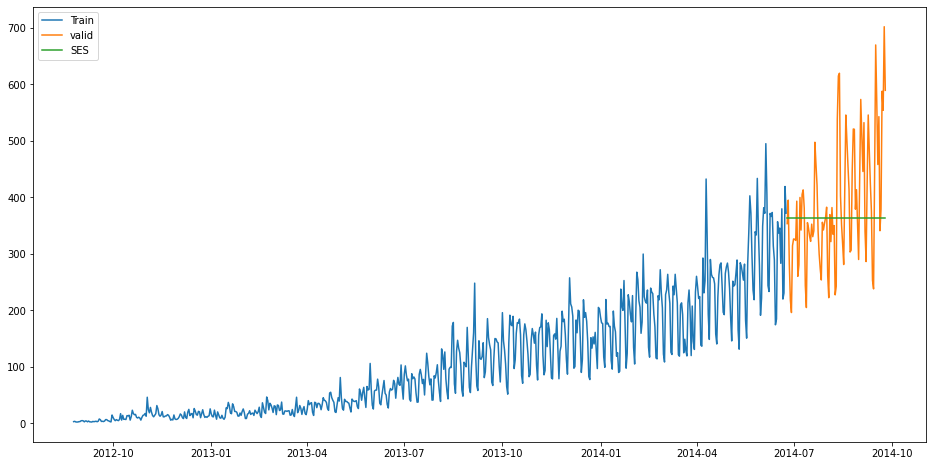

In [48]:
plt.figure(figsize =(16,8))
plt.plot(Train.Count, label ='Train')
plt.plot(valid.Count, label='valid')
plt.plot(valid_ses.SES, label = 'SES')
plt.legend(loc ='best')
plt.show()

In [49]:
rmse = sqrt(mean_squared_error(valid.Count, valid_ses['SES']))
print(rmse)

113.43708111884514


Holt's linear trend model 

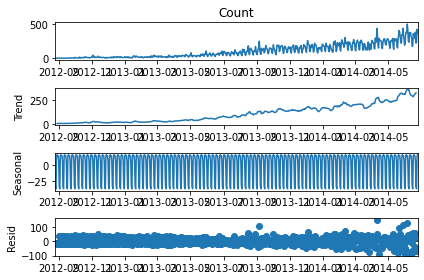

In [50]:
#hình dung chuỗi thời gian
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot()
result =sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [51]:
valid_holt = valid.copy()
fit1 = Holt(np.asarray(Train.Count)).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
valid_holt['Holt_linear'] = fit1.forecast(len(valid))

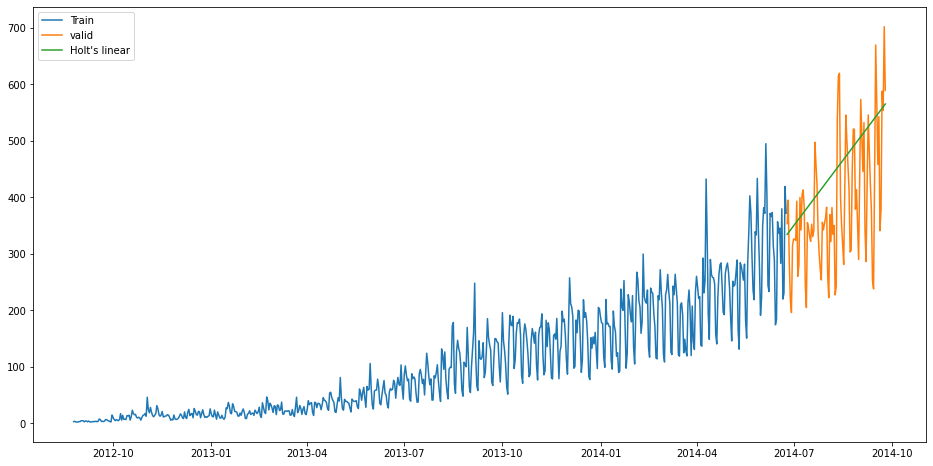

In [52]:
plt.figure(figsize =(16,8))
plt.plot(Train.Count, label ='Train')
plt.plot(valid.Count, label ='valid')
plt.plot(valid_holt.Holt_linear, label ="Holt's linear")
plt.legend(loc ='best')
plt.show()

In [53]:
rmse = sqrt(mean_squared_error(valid.Count, valid_holt['Holt_linear']))
print(rmse)

112.94278345314041


Holt trên chuỗi thời gian hàng ngày

In [54]:
submission = pd.read_csv('submision.csv')

In [55]:
submission.head()

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0


In [56]:
predict = fit1.forecast(len(test))

In [57]:
test['prediction'] = predict

Chuyển từ dự đoán hàng ngày sang hàng giờ

In [58]:
#caculating the hourly ratio of count
train_origional['ratio'] = train_origional['Count']/train_origional['Count'].sum()

In [59]:
#grouping the hourly ratio
temp =train_origional.groupby(['Hour'])['ratio'].sum()

In [60]:
#group to csv format
pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('GROUPby.csv')
temp2 =pd.read_csv('GROUPby.csv')
temp2=temp2.drop('Hour.1',1)

In [61]:
#merge test and test_orgional on day, month and year
merge = pd.merge(test, test_origional, on =('day','month','year'), how ='left')
merge['Hour'] =merge['Hour_y']
merge=merge.drop(['year','month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)


In [62]:
#predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on ='Hour', how='left')

In [63]:
#converting the ratio to the origional scale
prediction['Count'] =prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [64]:
# bỏ các tính năng khác, chỉ giữ lại ID và count
submission =prediction.drop(['ID_x', 'day','ID_y', 'prediction', 'Hour','ratio'], axis=1)


In [65]:
#converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt linear.csv')

In [66]:
Holt_linear = pd.read_csv('Holt linear.csv')

In [67]:
Holt_linear.head()

,Unnamed: 0,ID,Count
0,0,18288,355.692974
1,1,18289,283.861602
2,2,18290,240.234347
3,3,18291,198.497058
4,4,18292,167.075574


Holt's Winter method

In [68]:
valid_holt_winter = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train.Count), seasonal_periods= 7, trend ='add', seasonal='add').fit()


In [69]:
valid_holt_winter['Holt_Winter'] = fit1.forecast(len(valid))


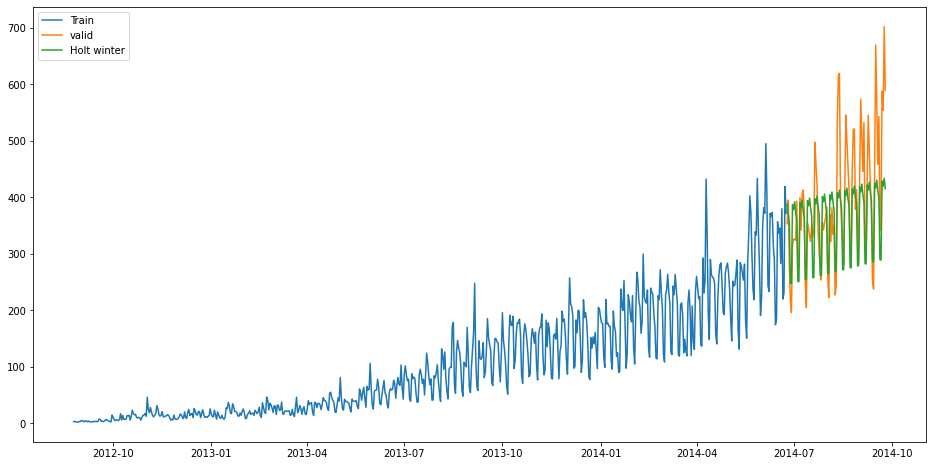

In [70]:
plt.figure(figsize=(16,8))
plt.plot(Train.Count, label='Train')
plt.plot(valid.Count, label='valid')
plt.plot(valid_holt_winter.Holt_Winter, label='Holt winter')
plt.legend(loc='best')
plt.show()

In [71]:
rmse= sqrt(mean_squared_error(valid.Count, valid_holt_winter.Holt_Winter))
rmse

81.94569995693239

In [90]:
#dự báo cho tệp test
predict =fit1.forecast(len(test))
test['prediction'] = predict
test.prediction.head()

Datetime
2014-09-26    388.682012
2014-09-27    370.221105
2014-09-28    356.592483
2014-09-29    247.878083
2014-09-30    247.429383
Freq: D, Name: prediction, dtype: float64

In [73]:
#merge test and test_orgional on day, month, year
merge=pd.merge(test, test_origional, on =('day', 'month', 'year'), how ='left')
merge['Hour'] =merge['Hour_y']
merge=merge.drop(['year', 'month','Datetime','Hour_x','Hour_y'], axis=1)



In [89]:
#predicting by merging merge and temp2
prediction =pd.merge(merge, temp2, on= ('Hour'), how ='left')
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,388.682012,18288,0,0.044287
1,18299.5,26.0,388.682012,18289,1,0.035343
2,18299.5,26.0,388.682012,18290,2,0.029911
3,18299.5,26.0,388.682012,18291,3,0.024714
4,18299.5,26.0,388.682012,18292,4,0.020802


In [88]:
#converting the ratio to the orginal scale
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day','Hour','ratio','ID_x','ID_y', 'prediction'], axis=1)

In [76]:
#converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_winter.csv')


SARIMAX model on daily time series

In [91]:
import statsmodels.api as sm



G:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


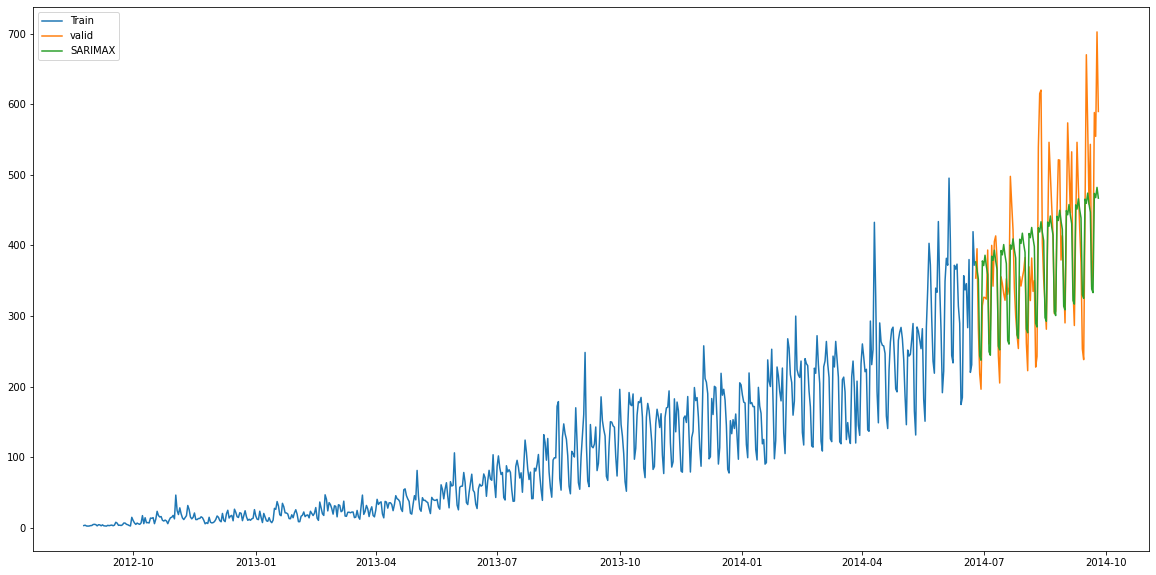

In [92]:
valid_sarimax = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order =(2,1,4), seasonal_order=(0,1,1,7)).fit()
valid_sarimax['SARIMAX'] = fit1.predict(start = '2014-6-25', end='2014-9-25', dynamic = True)
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label='valid')
plt.plot(valid_sarimax['SARIMAX'], label ='SARIMAX')
plt.legend(loc ='best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(valid.Count, valid_sarimax.SARIMAX))
print(rms)

69.7036780048166


In [102]:
predict = fit1.predict(start ='2014-9-26', end='2015-4-26', dynamic = True)
predict.head()

G:\Python\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2014-09-26    455.072951
2014-09-27    346.306140
2014-09-28    341.158342
2014-09-29    481.721835
2014-09-30    475.745662
Freq: D, Name: predicted_mean, dtype: float64

In [95]:
test['prediction'] = predict

In [96]:
# merge test and test_original on day, month and year
merge = pd.merge(test, test_origional, on =('day', 'month', 'year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis =1)

In [97]:
#predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on ='Hour', how='left')


In [98]:
# converting the ratio to the original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24


In [99]:
# keep ID and Count
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day', 'Hour', 'ratio', 'prediction', 'ID_x', 'ID_y'], axis =1)

In [ ]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns =['ID', 'Count']).to_csv('SARIMAX.csv')


In [101]:
sarimax_df = pd.read_csv('SARIMAX.csv')
sarimax_df.head()

,Unnamed: 0,ID,Count
0,0,18288,483.687077
1,1,18289,386.007593
2,2,18290,326.681317
3,3,18291,269.925101
4,4,18292,227.196773
